In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in 3 datasets for Pfizer, Moderna, and Janssen
Pfizer = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Pfizer.csv")
Moderna = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Moderna.csv")
Janssen = pd.read_csv("COVID-19_Vaccine_Distribution_Allocations_by_Jurisdiction_-_Janssen.csv")

In [3]:
Pfizer

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,04/05/2021,50310,50310
1,Maine,04/05/2021,19890,19890
2,Massachusetts,04/05/2021,95940,95940
3,New Hampshire,04/05/2021,19890,19890
4,Rhode Island,04/05/2021,15210,15210
...,...,...,...,...
1066,Virginia,12/14/2020,72150,72150
1067,Washington,12/14/2020,62400,62400
1068,West Virginia,12/14/2020,16575,16575
1069,Wisconsin,12/14/2020,49725,49725


In [4]:
Moderna

,Jurisdiction,Week of Allocations,1st Dose Allocations,2nd Dose Allocations
0,Connecticut,04/05/2021,37400,37400
1,Maine,04/05/2021,14300,14300
2,Massachusetts,04/05/2021,72100,72100
3,New Hampshire,04/05/2021,14300,14300
4,Rhode Island,04/05/2021,11300,11300
...,...,...,...,...
1003,Virginia,12/21/2020,146400,146400
1004,Washington,12/21/2020,128000,128000
1005,West Virginia,12/21/2020,32600,32600
1006,Wisconsin,12/21/2020,101000,101000


In [5]:
Janssen

,Jurisdiction,Week of Allocations,1st Dose Allocations
0,Connecticut,04/05/2021,53900
1,Maine,04/05/2021,20600
2,Massachusetts,04/05/2021,103800
3,New Hampshire,04/05/2021,20600
4,Rhode Island,04/05/2021,16200
...,...,...,...
310,Alaska,03/01/2021,8900
311,Idaho,03/01/2021,13300
312,Oregon,03/01/2021,34400
313,Washington,03/01/2021,60900


In [6]:
# merge the three datasets and rename columns for readability
merged = Pfizer.merge(Moderna, how='outer', on=['Jurisdiction','Week of Allocations'])
merged = merged.merge(Janssen, how='outer', on=['Jurisdiction','Week of Allocations'])

columns = ['Jurisdiction','Week','Pfizer 1st Dose','Pfizer 2nd Dose','Moderna 1st Dose','Moderna 2nd Dose','Janssen Dose']
merged.columns = columns
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,04/05/2021,50310,50310,37400.0,37400.0,53900.0
1,Maine,04/05/2021,19890,19890,14300.0,14300.0,20600.0
2,Massachusetts,04/05/2021,95940,95940,72100.0,72100.0,103800.0
3,New Hampshire,04/05/2021,19890,19890,14300.0,14300.0,20600.0
4,Rhode Island,04/05/2021,15210,15210,11300.0,11300.0,16200.0
...,...,...,...,...,...,...,...
1066,Virginia,12/14/2020,72150,72150,NaN,NaN,NaN
1067,Washington,12/14/2020,62400,62400,NaN,NaN,NaN
1068,West Virginia,12/14/2020,16575,16575,NaN,NaN,NaN
1069,Wisconsin,12/14/2020,49725,49725,NaN,NaN,NaN


In [7]:
# replace NaN values to 0 for now to represent no doses for that period
merged = merged.fillna(0)

# change week column to something more sort friendly
merged['Week'] = pd.to_datetime(merged.Week)
merged

,Jurisdiction,Week,Pfizer 1st Dose,Pfizer 2nd Dose,Moderna 1st Dose,Moderna 2nd Dose,Janssen Dose
0,Connecticut,2021-04-05,50310,50310,37400.0,37400.0,53900.0
1,Maine,2021-04-05,19890,19890,14300.0,14300.0,20600.0
2,Massachusetts,2021-04-05,95940,95940,72100.0,72100.0,103800.0
3,New Hampshire,2021-04-05,19890,19890,14300.0,14300.0,20600.0
4,Rhode Island,2021-04-05,15210,15210,11300.0,11300.0,16200.0
...,...,...,...,...,...,...,...
1066,Virginia,2020-12-14,72150,72150,0.0,0.0,0.0
1067,Washington,2020-12-14,62400,62400,0.0,0.0,0.0
1068,West Virginia,2020-12-14,16575,16575,0.0,0.0,0.0
1069,Wisconsin,2020-12-14,49725,49725,0.0,0.0,0.0


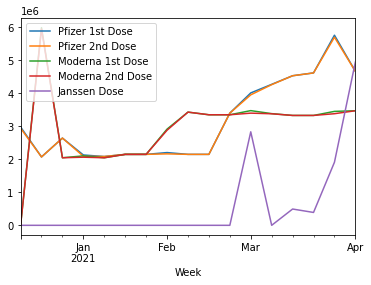

In [8]:
# quick and simple EDA to look at number of doses over times
merged.groupby('Week').sum().plot();

In [9]:
# Total dose over time by brand (Doesn't matter if it's first or second)
totalDose = merged.copy()
totalDose['Pfizer'] = totalDose['Pfizer 1st Dose'] + totalDose['Pfizer 2nd Dose']
totalDose['Moderna'] = totalDose['Moderna 1st Dose'] + totalDose['Moderna 2nd Dose']
totalDose['Janssen'] = totalDose['Janssen Dose']
totalDose=totalDose.drop(['Pfizer 1st Dose', 'Pfizer 2nd Dose', 'Moderna 1st Dose', 'Moderna 2nd Dose', 'Janssen Dose'], axis=1)
totalDose

,Jurisdiction,Week,Pfizer,Moderna,Janssen
0,Connecticut,2021-04-05,100620,74800.0,53900.0
1,Maine,2021-04-05,39780,28600.0,20600.0
2,Massachusetts,2021-04-05,191880,144200.0,103800.0
3,New Hampshire,2021-04-05,39780,28600.0,20600.0
4,Rhode Island,2021-04-05,30420,22600.0,16200.0
...,...,...,...,...,...
1066,Virginia,2020-12-14,144300,0.0,0.0
1067,Washington,2020-12-14,124800,0.0,0.0
1068,West Virginia,2020-12-14,33150,0.0,0.0
1069,Wisconsin,2020-12-14,99450,0.0,0.0


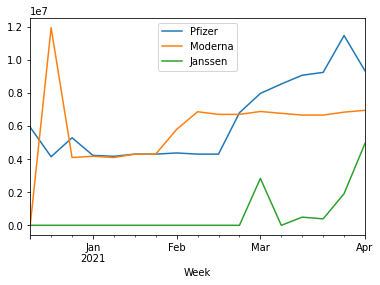

In [10]:
# quick and simple EDA to look at Total dose over time by brand
totalDose.groupby('Week').sum().plot();

            Pfizer 1st Dose  Pfizer 2nd Dose  Moderna 1st Dose  \
Week                                                             
2020-12-14            85800            85800               0.0   
2020-12-21            60450            60450          174600.0   
2020-12-28            78000            78000           60300.0   
2021-01-04            60450            60450           60100.0   
2021-01-11            60450            60450           60300.0   
2021-01-18            63375            63375           63300.0   
2021-01-25            63375            63375           63300.0   
2021-02-01            62400            62400           83600.0   
2021-02-08            63375            63375           91300.0   
2021-02-15            63375            63375           98700.0   
2021-02-22            99450            99450           98700.0   
2021-03-01           114660           114660           98700.0   
2021-03-08           125190           125190           98700.0   
2021-03-15

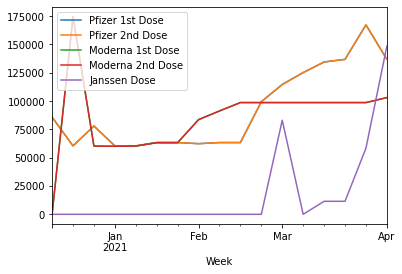

In [112]:
# Illinois's vaccine distribution data over time
illinois = merged.copy()
illinois = illinois[illinois['Jurisdiction'] == "Illinois"]
illinois.groupby('Week').sum().plot();
print(illinois.groupby('Week').sum())

Index(['California', 'Texas', 'Florida', 'Federal Entities', 'Ohio'], dtype='object', name='Jurisdiction')
Jurisdiction  California  Federal Entities    Florida      Ohio      Texas
Week                                                                      
2020-12-14      655200.0          298350.0   358800.0  196950.0   448500.0
2020-12-21     1811250.0          792150.0   991250.0  544200.0  1240800.0
2020-12-28     1059350.0          457400.0   579850.0  318800.0   725750.0
2021-01-04      926900.0          426400.0   506700.0  279400.0   634850.0
2021-01-11      930650.0          404550.0   509650.0  279800.0   638000.0
2021-01-18      971600.0          420600.0   532200.0  292650.0   665700.0
2021-01-25      971600.0          421200.0   532200.0  292650.0   665700.0
2021-02-01     1125650.0          527230.0   615450.0  337500.0   770550.0
2021-02-08     1187400.0         1173400.0   650200.0  357450.0   813500.0
2021-02-15     1244200.0          537600.0   681200.0  374450.0   85

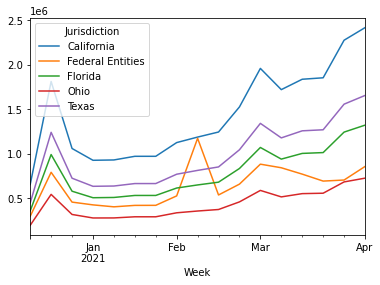

In [125]:
# Create a list to get total by week
percentageByWeek = merged.copy()
percentageByWeek = percentageByWeek.groupby('Week').sum()
percentageByWeek = percentageByWeek.rename(columns={"Pfizer 1st Dose": "Pfizer 1st Dose Total", 
                                 "Pfizer 2nd Dose": "Pfizer 2nd Dose Total", 
                                 "Moderna 1st Dose": "Moderna 1st Dose Total", 
                                 "Moderna 2nd Dose": "Moderna 2nd Dose Total", 
                                 "Janssen Dose": "Janssen Dose Total"})

# Join data with the original data, so we get calculate the percentage for each column
percentage = merged.copy()
percentage = percentage.join(percentageByWeek, on='Week')
percentage["Pfizer 1st Dose %"] = percentage["Pfizer 1st Dose"] / percentage["Pfizer 1st Dose Total"] * 100
percentage["Pfizer 2nd Dose %"] = percentage["Pfizer 2nd Dose"] / percentage["Pfizer 2nd Dose Total"] * 100
percentage["Moderna 1st Dose %"] = percentage["Moderna 1st Dose"] / percentage["Moderna 1st Dose Total"] * 100
percentage["Moderna 2nd Dose %"] = percentage["Moderna 2nd Dose"] / percentage["Moderna 2nd Dose Total"] * 100
percentage["Janssen Dose %"] = percentage["Janssen Dose"] / percentage["Janssen Dose Total"] * 100
percentage = percentage[["Jurisdiction","Week",
                         "Pfizer 1st Dose %", "Pfizer 2nd Dose %",
                         "Moderna 1st Dose %", "Moderna 2nd Dose %",
                         "Janssen Dose %"]].fillna(0)
#print(percentage.groupby('Jurisdiction').sum().sort_values(by=['Pfizer 1st Dose %', 'Pfizer 2nd Dose %'], ascending=False).head(5).index)
top5 = percentage.groupby('Jurisdiction').sum().sort_values(by=['Pfizer 1st Dose %', 'Pfizer 2nd Dose %'], ascending=False).head(5).index

print(top5)
top5Result = merged.copy()
top5Result = top5Result[top5Result['Jurisdiction'].isin(top5)]

top5Result["Total"] = (top5Result["Pfizer 1st Dose"] + top5Result["Pfizer 2nd Dose"] + top5Result["Moderna 1st Dose"] + top5Result["Moderna 2nd Dose"] + top5Result["Janssen Dose"])
top5Result = top5Result[["Jurisdiction", "Week", "Total"]]
top5Result = top5Result.pivot(index="Week", columns='Jurisdiction')["Total"] # Flip to match plot format
top5Result.plot()
print(top5Result)